# NGCC and SMR integrated energy system baseline example and costing anaylsis

Steam Methane Reforming (SMR) is a widely used industrial process for producing hydrogen gas from natural gas. The process involves reacting natural gas (methane) with steam at high temperatures (800-1000°C) and under pressure (20-30 bar) in the presence of a catalyst to produce hydrogen gas (H2) and carbon monoxide (CO). The reaction is endothermic and requires a large amount of heat, which is usually supplied by burning a portion of the natural gas. 
The integration of the steam reformer process with a natural gas combined cycle (NGCC) power plant offers several advantages. NGCC power plants are highly efficient and clean energy sources, producing lower emissions than traditional fossil fuel power plants. By utilizing the waste heat generated from the NGCC power plant, the steam reformer process can be optimized for higher efficiency and lower costs.
The integration of the steam reformer process with an NGCC power plant also offers the potential for carbon capture and storage (CCS) technology. The carbon dioxide produced during the steam reformer process can be captured and stored, reducing greenhouse gas emissions from both the steam reformer process and the NGCC power plant.
Overall, the integration of the steam reformer process with an NGCC power plant provides a promising pathway for the production of clean hydrogen gas and the generation of clean energy. As the world transitions towards a low-carbon economy, the integration of these technologies can play a significant role in reducing greenhouse gas emissions and promoting sustainable energy production.

## 1. Import the NGCC + SMR  process model

In [1]:
from ngcc_plus_smr_ies import get_full_plant_model as build_ngcc_plus_smr_ies

## 2. Build the NGCC + SMR process simualtion

In [2]:
ies_model = build_ngcc_plus_smr_ies()

Ipopt 3.13.2: tol=1e-07
linear_solver=ma27
max_iter=200
bound_push=1e-16


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes 

## 3. Display the Process Flowsheet Diagram of the NGCC + SMR process

The syngas side of the hydrogen production process is the same as the NGCC+SMR system described above.  The exhaust of the gas turbine is also fed to the SMR furnace.  Since the gas turbine is much larger than the one in the NGCC+SMR configuration while the size of the hydrogen production plant is identical to the first configuration, the gas turbine exhaust can provide enough O2 for the combustion in the SMR furnace even at low load conditions.  The flue gas leaving the furnace enters the second natural gas preheater before going to an HRSG.  The flue gas leaving the HRSG enters the first natural gas preheater such that its low-grade heat is recovered before entering a post-combustion carbon capture system.  The captured CO2 is combined with the CO2 from the pre-combustion capture system and eventually goes through a compression and purification unit (CPU) before being sent to the pipeline for utilization and storage.  The LP steam required by the reboilers of the pre- and post-combustion CO2 capture units is extracted from the IP/LP crossover of the steam turbine.  No separate LP steam generator is needed.  Multiple heat exchangers and knockout condensers are also used to recover the heat in the syngas before and after the water-gas shift reactor and to knockout excess water in the syngas such that it can be recycled back to the SMR reactor.  To generate the MP steam, the makeup feed water is pumped by an MP pump, heated up by the syngas in an MP knockout condenser and then combined with the liquid water knocked out by the MP knockout condenser itself, a knockout condenser cooled by the reboiler return water (Reboiler Knockout as shown in Figure 2), an LP knockout condenser, and another knockout condenser cooled by cooling water.  An MP booster pump is used to raise the water pressure.  The water stream after the booster pump is then heated by the syngas after the water gas shift reactor and then vaporized and superheated by the syngas before the water gas shift reactor.  The natural gas feedstock is first preheated in the first preheater (NG Preheat1) by the flue gas leaving the LP economizer and then heated in the second preheater (NG Preheat2) by the flue gas leaving the SMR furnace.  The preheated natural gas mixes with the superheated MP steam before entering the tube side of the SMR reactor.  This IES configuration also has one pre-combustion capture system and one post-combustion capture system.

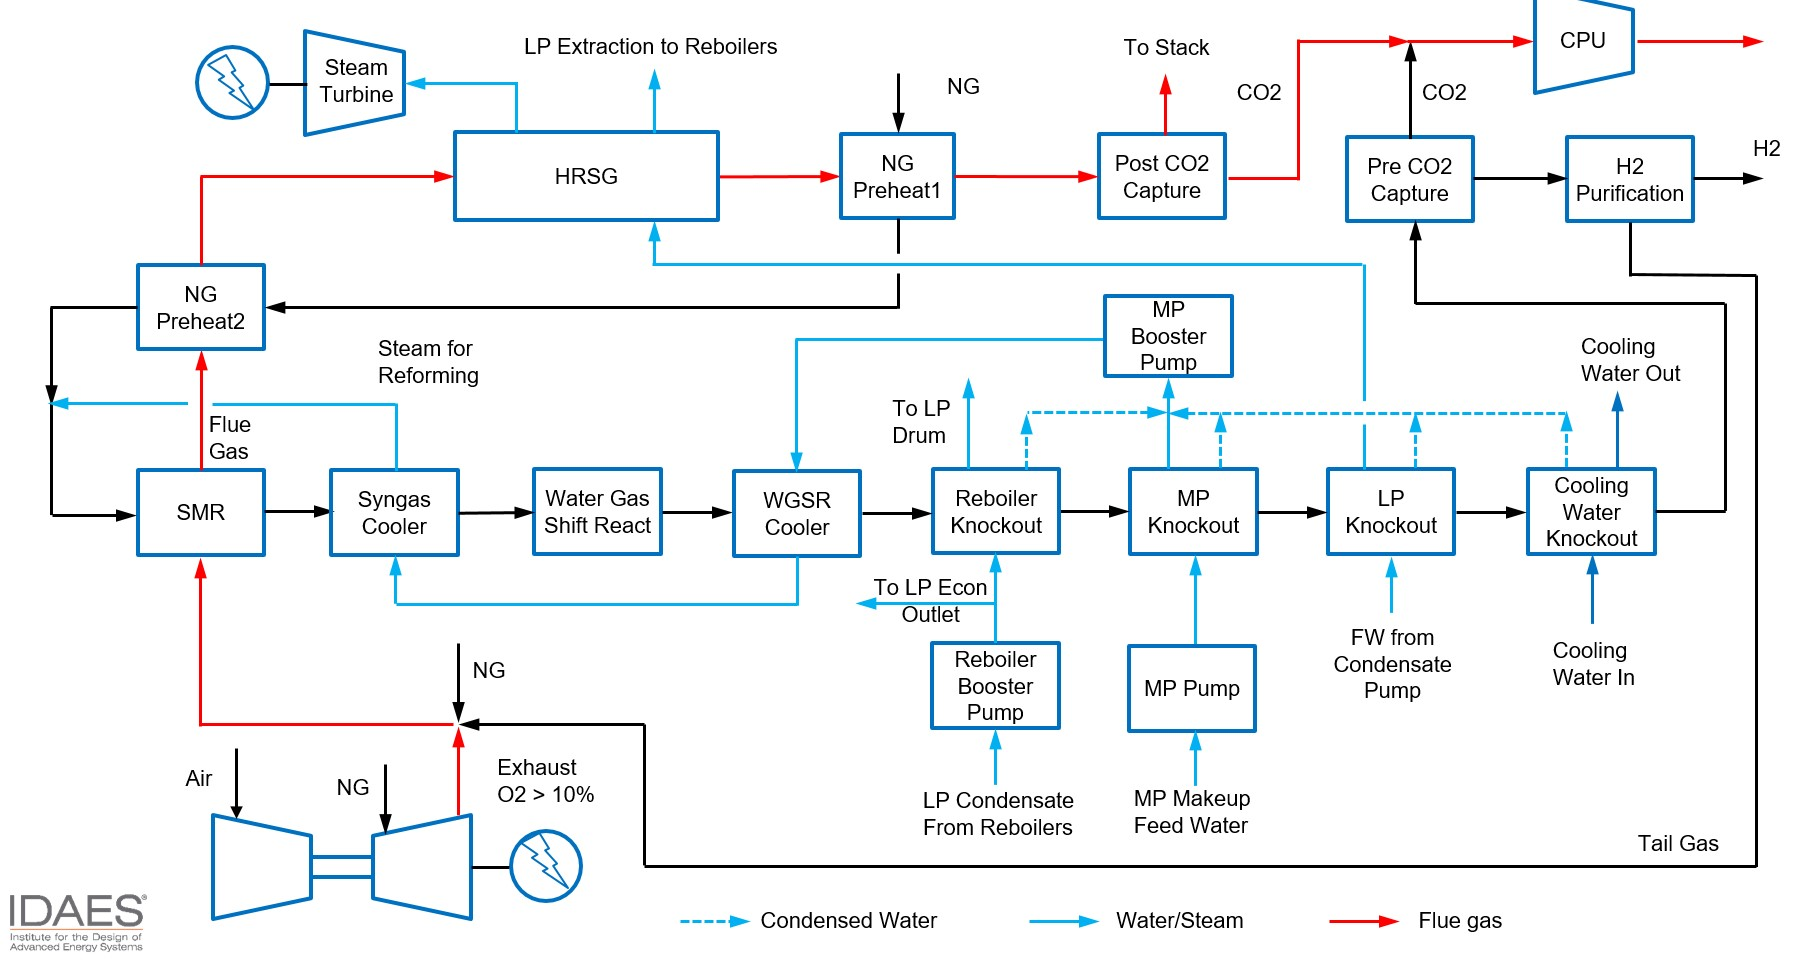

In [3]:
from IPython.display import display, Image
display(Image(filename = "ngcc_smr_pfd.jpg"))

## 4.Display the results summary of process simulation

In [4]:
import pandas as pd
import pyomo.environ as pyo

m = ies_model
res = pd.DataFrame(index = ['values'])

res['Net power MW'] = round(pyo.value(-m.fs.gt_net_power[0]/1e6+m.fs.st_net_power[0]/1e6-60.12,2))
    
res['H2 production Rate (kg/hr)'] = round(
                                    pyo.value(m.fs.h2_separator.h2_outlet.flow_mol[0]*m.fs.h2_separator.h2_outlet_state[0].mw)*3600
                                    ,2)
res['CO2 Product from Pre-combustion Capture (kg/hr)'] = round(
                                                         pyo.value(m.fs.co2_pre_separator.co2_outlet_state[0].flow_mol*m.fs.co2_pre_separator.co2_outlet_state[0].mole_frac_comp['CO2']*44*3.6)
                                                         ,2)

res['CO2 Product from Post-combustion Capture (kg/hr)'] = round(
                                                         pyo.value(m.fs.smr_shell.outlet.flow_mol[0]*m.fs.smr_shell.outlet.mole_frac_comp[0,'CO2']*0.97*44*3.6)
                                                         ,2)
res['Flue Gas Flow Rate (kg/s)'] =  round(
                                    pyo.value(m.fs.smr_shell.outlet.flow_mol[0]*m.fs.smr_shell.control_volume.properties_out[0].mw)
                                   ,2)
res['Natural Gas Feed Rate to SMR As Reactant (kg/hr)'] = round(
                                              pyo.value(m.fs.ng_preheat1.tube_inlet.flow_mol[0]*16.5143*3.6)
                                             ,2)
res['Natural Gas Feed Rate to SMR Furnace As Fuel (kg/hr)'] =round(
                                             pyo.value(m.fs.smr_shell_mix.fuel_inlet.flow_mol[0]*16.5143*3.6)
                                            ,2)
res['Natural Gas Feed Rate to Gas Turbine (kg/hr)'] =  round(
                                               pyo.value(m.fs.gt_mix.fuel_inlet_state[0].flow_mol*16.5143*3.6)
    ,2)

res.T

,values
Net power MW,315.00
H2 production Rate (kg/hr),20111.67
CO2 Product from Pre-combustion Capture (kg/hr),123956.43
CO2 Product from Post-combustion Capture (kg/hr),181218.76
Flue Gas Flow Rate (kg/s),505.22
Natural Gas Feed Rate to SMR As Reactant (kg/hr),60888.42
Natural Gas Feed Rate to SMR Furnace As Fuel (kg/hr),10044.07
Natural Gas Feed Rate to Gas Turbine (kg/hr),47263.93


validate the simulation results for testing

In [5]:
import pytest
assert res.at['values','H2 production Rate (kg/hr)'] == pytest.approx(20111.67,rel = 1e-8)
assert res.at['values','Flue Gas Flow Rate (kg/s)'] == pytest.approx(505.22,rel = 1e-8)

store the process simulation results

In [6]:
import pandas as pd
import os
result0 = pd.DataFrame()
result0['h2'] = res['H2 production Rate (kg/hr)'] 
result0['power'] = pyo.value(-m.fs.gt_net_power[0]/1e6+m.fs.st_net_power[0]/1e6)
result0['co2'] = res['CO2 Product from Post-combustion Capture (kg/hr)']
result0['ng'] = -(res['Natural Gas Feed Rate to SMR As Reactant (kg/hr)'] +
                 res['Natural Gas Feed Rate to SMR Furnace As Fuel (kg/hr)'] +
                 res['Natural Gas Feed Rate to Gas Turbine (kg/hr)'] )
result0['fg'] =  res['Flue Gas Flow Rate (kg/s)']
path = 'result/case4t.csv'
if not os.path.exists(path):
    result0.T.to_csv(path)

## 5. Run the costing analysis of the NGCC + SMR process

In this work, a sophisticated bottom-up costing framework is built by implementing the methodology originally proposed by National Energy Technology Laboratory (NETL). The NETL costing methodology has been successfully applied in various applications from different types of power plants to hydrogen generation plants. Detailed information about NETL costing methodology is available in the 2019 revision of the Quality Guidelines for Energy System Studies (QGESS) document titled “Cost Estimation Methodology for NETL Assessment of Power Plant Performance.” (Theis, 2019) https://www.osti.gov/biblio/1567736

Import existing functions in the costing.py file and get them ready to use for the costing analysis later

In [7]:
from costing import *

The first step before start to doing the costing analysis is to set the background of the case, which includes the name of the plant and the assumed the capacity factor. In this example, we set the capacity of the NGCC + SMR plant as 100 %. 

In [8]:
plant = Plant('smr_ngcc', 1)

The second step is to prepare other data for the costing analysis in this case. The assumed power price and fuel price are stored in the price files. They are fixed for the costing analysis in this step. But we will demonstrate the way to release them as degrees of freedoms in the later section. Based on the input information defined so far, the costing was completed and the levelized cost of hydrogen was used in this work as the key index.

In [9]:
import costing as cs
LCOH = cs.costing(plant)

## 6. Summary of costing results using LCOH

Levelized Cost of Hydrogen (LCOH) is a widely used metric to compare the costs of different hydrogen production technologies. LCOH represents the cost of producing one kilogram of hydrogen over the lifetime of the production plant, taking into account all capital costs, operating costs, and the present value of future costs. It is expressed in units of currency per kilogram of hydrogen ($/kg H2).

The calculation of LCOH involves estimating the total costs of the hydrogen production plant over its lifetime, including the investment costs for construction and equipment, the operating costs for materials, labor, energy, and maintenance, and the costs associated with the end-of-life decommissioning of the plant. These costs are then divided by the total amount of hydrogen produced over the lifetime of the plant to obtain the LCOH.

LCOH is a useful metric for comparing different hydrogen production technologies because it accounts for the total cost of producing hydrogen, including both capital and operating costs, and provides a level playing field for comparing the costs of different technologies. It also takes into account the time value of money, meaning that future costs are discounted to present value, so that the costs of the different technologies can be compared over the same period of time.

In [10]:
import pandas as pd
lcoh = pd.read_csv('LCOH.csv', header = 0, index_col = 0) 
print(lcoh)

              Value, $/kg H2
Capital                 0.63
Fixed O&M               0.24
Variable O&M            0.15
Fuel                    1.29
CO2 S&T                 0.15
Total                   2.46


In [11]:
power_out = res['Net power MW']
power_price = 71.7
power_credits = ((power_out * 24 * 365 * power_price *plant.cf )/
                (res['H2 production Rate (kg/hr)']* 24 * 365 * plant.cf))
df = lcoh.T
df['Power Credits'] = -power_credits.values
lcoh =  df.T
df['Net Total'] = df['Total'] + df['Power Credits']
df.round(2).T

,"Value, $/kg H2"
Capital,0.63
Fixed O&M,0.24
Variable O&M,0.15
Fuel,1.29
CO2 S&T,0.15
Total,2.46
Power Credits,-1.12
Net Total,1.34


##  7. Plot the bar chart of LCOH

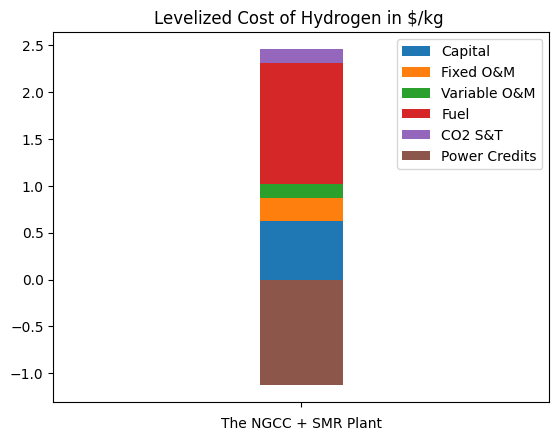

In [12]:
import matplotlib.pyplot as plt

df = pd.DataFrame()
df = lcoh.T.drop('Total', axis = 1)
df['The NGCC + SMR Plant'] = ''

df.plot(x='The NGCC + SMR Plant', kind='bar', stacked=True,
        title='Levelized Cost of Hydrogen in $/kg ',
        width = 0.1)
plt.show()


## 8. LCOH sensitivity study on various power price

create the power price list from $$ 30/MWh to $100/MWh

In [13]:
pp_list = list(range(30,100,10))
LCOH_pp_list = []
for pp in pp_list:
    power_credits = ((power_out * 24 * 365 * pp *plant.cf )/
                (res['H2 production Rate (kg/hr)']* 24 * 365 * plant.cf))
    LCOH_pp_list.append(lcoh.T['Total'] - power_credits.values)

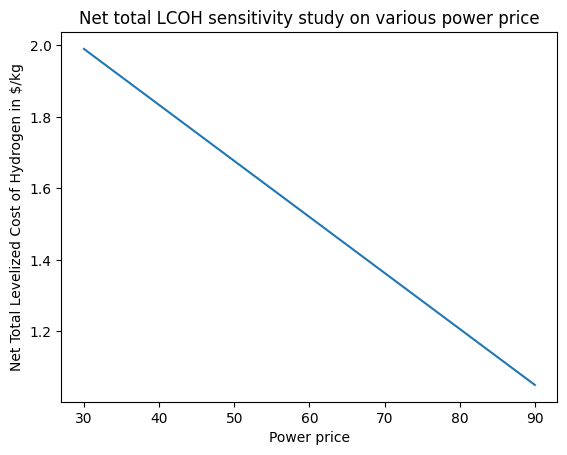

In [14]:
import matplotlib.pyplot as plt
plt.plot(pp_list, LCOH_pp_list)
plt.title('Net total LCOH sensitivity study on various power price')
plt.xlabel("Power price")
plt.ylabel('Net Total Levelized Cost of Hydrogen in $/kg')
plt.show()

## 9. LCOH sensitivity study on various fuel price

vary fuel price from 3 to 8 dollars per MMBTU

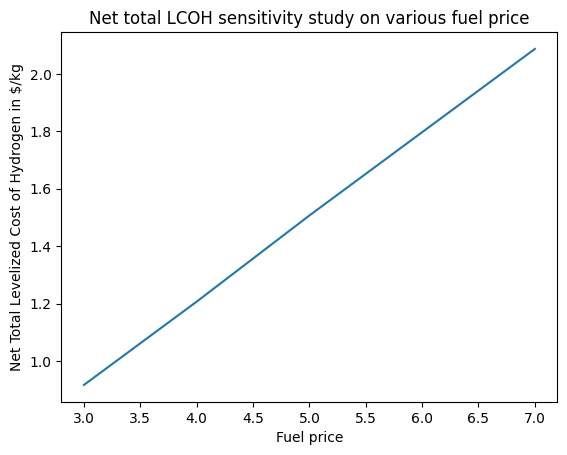

In [15]:
import matplotlib.pyplot as plt
import costing as cs
fp_list = list(range(3,8,1))
LCOH_fp_list = []
for fp in fp_list:
    price_sen = pd.read_csv('reference/price.csv', header = 0, index_col = 0)
    price_sen.at['ng','instant'] = fp
    price_sen.to_csv('reference/price.csv')
    plant = Plant('smr_ngcc', 1)
    LCOH_fp = cs.costing(plant) 
    power_credits = ((power_out * 24 * 365 * power_price *plant.cf )/
                (res['H2 production Rate (kg/hr)']* 24 * 365 * plant.cf))
    LCOH_fp_list.append(LCOH_fp.at['Total','Value, $/kg H2']-power_credits.values)
price_sen = pd.read_csv('reference/price.csv', header = 0, index_col = 0)
price_sen.at['ng','instant'] = 4.42
price_sen.to_csv('reference/price.csv')

plt.plot(fp_list, LCOH_fp_list)
plt.title('Net total LCOH sensitivity study on various fuel price')
plt.xlabel("Fuel price")
plt.ylabel('Net Total Levelized Cost of Hydrogen in $/kg')
plt.show()

# 10 Summary

This notebook serves as an example of a NGCC plus SMR IES plant baseline case and its associated costing analysis. The notebook includes a step-by-step guide to building an NGCC+SMR process simulation and the attached flowsheet diagram provides a visual representation of the process. The notebook also includes testing to validate results, ensuring accuracy in the analysis. The costing analysis is completed for the baseline case using the LCOH (levelized cost of hydrogen) index, and a categorized bar chart is plotted to provide a clear visual representation of the costs. Additionally, the notebook includes a sensitivity study that explores the impact of various fuel prices and power prices on the overall cost of hydrogen production. 